低通巴特沃斯传递函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, lfilter, freqz

低通巴特沃斯传递函数

设计截止频率为 300 Hz 的 6 阶低通巴特沃斯滤波器，对于以 1000 Hz 的速率采样的数据，截止频率对应于 0.6π 弧度/采样点。绘制其幅值和相位响应。用它对长度为 1000 个采样的随机信号进行滤波。

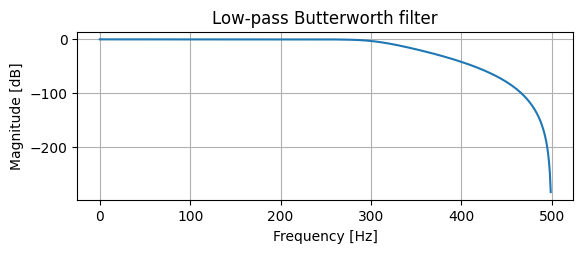

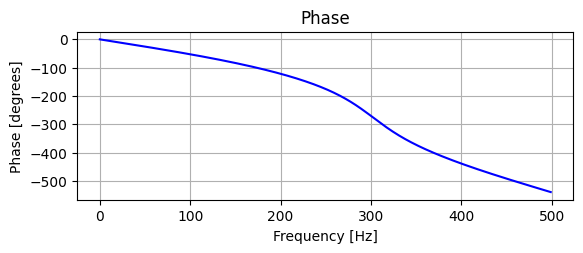

In [2]:
fc = 300
fs = 1000
b, a = signal.butter(6, fc / (fs / 2))
w, h = signal.freqz(b, a, fs=fs)

# 绘制频率响应
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Low-pass Butterworth filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.show()

# 绘制相位响应
plt.subplot(2, 1, 2)
plt.plot(w, np.degrees(np.unwrap(np.angle(h))), 'b')
plt.title('Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degrees]')
plt.grid()
plt.show()

带阻巴特沃斯滤波器

设计一个 6 阶带阻巴特沃斯滤波器，其归一化边缘频率为 0.2π 和 0.6π 弧度/采样点。绘制其幅值和相位响应。用它对随机数据进行滤波。

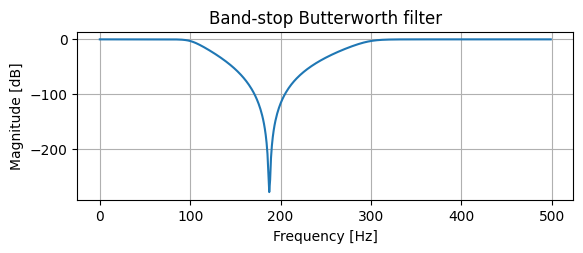

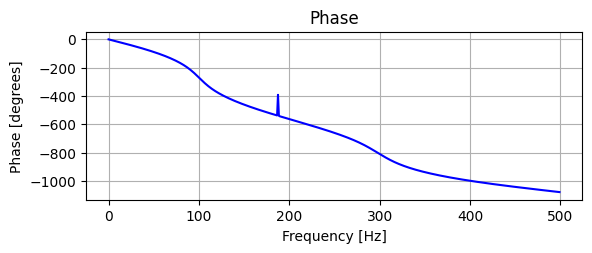

In [3]:
# 设计带阻巴特沃斯滤波器
order = 6  # 阶数
Wn = [0.2, 0.6]  # 归一化边缘频率
b, a = butter(order, Wn, btype='bandstop')
worN=8000

# 绘制频率响应
w, h = freqz(b, a,fs = fs)

# 绘制幅度响应
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Band-stop Butterworth filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.show()

# 绘制相位响应
plt.subplot(2, 1, 2)
plt.plot(w, np.degrees(np.unwrap(np.angle(h))), 'b')
plt.title('Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degrees]')
plt.grid()
plt.show()

高通巴特沃斯滤波器

<ipython-input-4-da2589edec17>:12: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)))


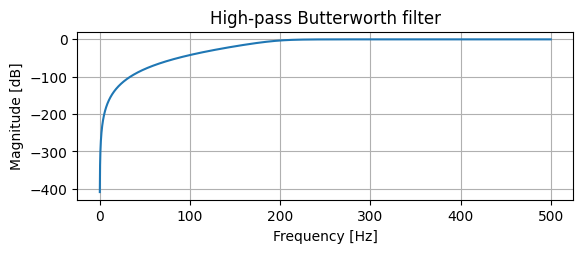

<ipython-input-4-da2589edec17>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


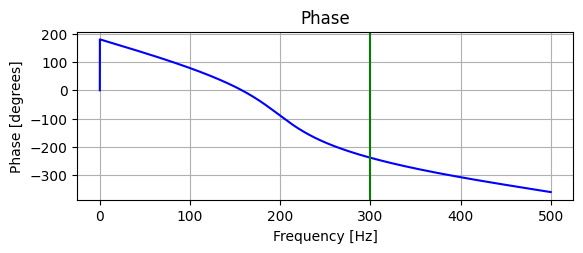

In [4]:
from scipy.signal import butter, freqz, sos2zpk, zpk2sos,sosfreqz

Wn = 200/500  # 归一化边缘频率
z, p, k = butter(order,Wn, btype='high', analog=False, output='zpk')
sos = zpk2sos(z, p, k)

# 使用sosfreqz函数计算频率响应
w, h = sosfreqz(sos, worN=5500, fs=fs)

# 绘制幅度响应
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('High-pass Butterworth filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.show()
plt.axvline(fc, color='green')  # 标记截止频率

# 绘制相位响应
plt.subplot(2, 1, 2)
plt.plot(w, np.degrees(np.unwrap(np.angle(h))), 'b')
plt.title('Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degrees]')
plt.grid()
plt.axvline(fc, color='green')  # 标记截止频率
plt.show()


带通巴特沃斯滤波器

设计一个 20 阶带通巴特沃斯滤波器，其截止频率下限为 500 Hz，截止频率上限为 560 Hz。指定采样率为 1500 Hz。使用状态空间表示。使用 designfilt 设计一个相同的滤波器。

C:\Users\112\AppData\Local\Temp\ipykernel_25844\2618587354.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)))


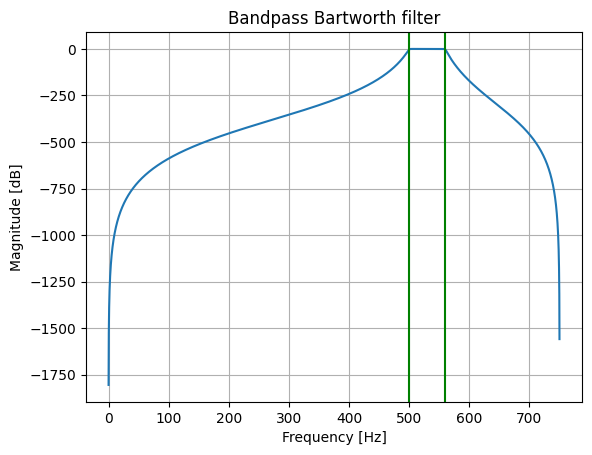

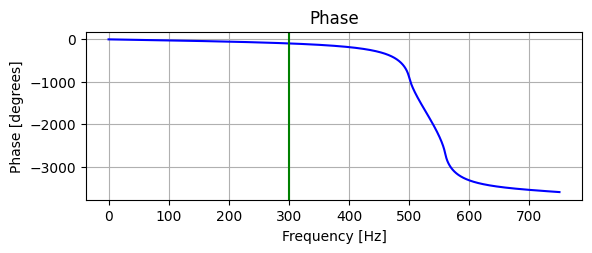

In [4]:
from scipy.signal import butter, sosfreqz

# 设计带通巴特沃斯滤波器
fs = 1500  # 采样频率
f1 = 500  # 截止频率下限
f2 = 560  # 截止频率上限
order = 20  # 阶数
Wn = [f1 / (fs / 2), f2 / (fs / 2)]  # 归一化截止频率

# 直接使用butter函数设计滤波器并获取二阶节表示
sos = butter(order, Wn, btype='band', output='sos')

# 使用sosfreqz函数计算频率响应
w, h = sosfreqz(sos, worN=8000, fs=fs)

# 绘制幅度响应
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Bandpass Bartworth filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.axvline(f1, color='green')  # 标记下截止频率
plt.axvline(f2, color='green')  # 标记上截止频率
plt.show()

# 绘制相位响应
plt.subplot(2, 1, 2)
plt.plot(w, np.degrees(np.unwrap(np.angle(h))), 'b')
plt.title('Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degrees]')
plt.grid()
plt.axvline(fc, color='green')  # 标记截止频率
plt.show()
